# Create MLP model

We create and train a MLP model exactly like in this figure. We will use it
for the excercises in the Advanced Topics Part I

<img src="../NotebooksFigures/mlp.png" alt="drawing" width="500" >

In [1]:
import tensorflow as tf
import keras as k
import numpy as np
from matplotlib import pyplot as plt
from jupyterthemes import jtplot
from keras.datasets import mnist
from keras import layers
from keras.models import Model, load_model
from keras import optimizers
from keras import losses
from keras import callbacks
from keras.utils.np_utils import to_categorical
from keras import regularizers
import os.path as path
import os
import pickle
from keras import backend as K

jtplot.style(grid=False, ticks=True)

Using TensorFlow backend.


In [2]:
def show_test(model, validation_data):
    labels = np.argmax(model.predict(validation_data[0]), axis=1)
    ground_truth = np.argmax(validation_data[1], axis=1)
    accuracy = np.sum(labels == ground_truth)/labels.size
    num_errors = min(np.sum(labels != ground_truth), 20)
    errors = np.random.choice(np.nonzero(labels != ground_truth)[0], num_errors, replace=False)
    correct = np.random.choice(
        np.nonzero(labels == ground_truth)[0], 60 - num_errors, replace=False)
    stimuli = np.hstack((errors, correct))
    np.random.shuffle(stimuli)
    plt.style.use('grayscale')
    num_columns = 10
    num_rows = 6
    fig, axes = plt.subplots(num_rows, 10, figsize=(20, 3 * num_rows))
    for idx, ax in zip(stimuli, axes.ravel()):
        if idx in errors:
            c = 'r'
        else:
            c = 'k'
        ax.matshow(validation_data[0][idx, :, :, 0])
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title('Prediction: '+str(labels[idx])+
                     ' \n Truth: '+str(ground_truth[idx]), color=c)
    plt.suptitle("Model accuracy: "+str(accuracy*100)+" %")
    plt.show()
    jtplot.style(grid=False, ticks=True)

In [6]:
(i_train, l_train), (i_test, l_test) = mnist.load_data()
i_train, i_test = i_train/255.0, i_test/255.0
i_train, i_test = i_train.astype(np.float32), i_test.astype(np.float32)
i_train, i_test = np.expand_dims(i_train, 3), np.expand_dims(i_test, 3)
l_train, l_test = to_categorical(l_train), to_categorical(l_test)
i_validate = i_train[50000:, :, :, :]
i_train = i_train[0:50000, :, :, :]
l_validate = l_train[50000:, :]
l_train = l_train[0:50000, :]

In [7]:
if not path.isdir('models'):
    os.mkdir('models')

if path.isfile(path.join('models', 'training_hist.pkl')):
    with open(path.join('models', 'training_hist.pkl'), 'rb') as f:
        history = pickle.load(f)

In [8]:
minibatch_size = 10
n_epochs = 60
learn_rate = 0.1
history = {}
tb_params = {
    'write_images': True, 'histogram_freq': 5, 
    'write_grads': True, 'write_graph': False
            }
activation_fcn = 'sigmoid'

In [9]:
# Define architecture

img = layers.Input(shape=(28, 28, 1,), name='images')
x = layers.Flatten()(img)
x = layers.Dense(100, activation=activation_fcn, name='hidden1')(x)
x = layers.Dense(100, activation=activation_fcn, name='hidden2')(x)
x = layers.Dense(100, activation=activation_fcn, name='hidden3')(x)
out = layers.Dense(10, activation='softmax', name='output')(x)

In [12]:
model = Model(img, out)
opt = optimizers.SGD(lr=learn_rate)
model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['accuracy'])
h = model.fit(
    i_train, l_train, validation_data=(i_validate, l_validate), epochs=n_epochs,
    batch_size=minibatch_size)
model.save(path.join('models', 'mlp3.h5'))

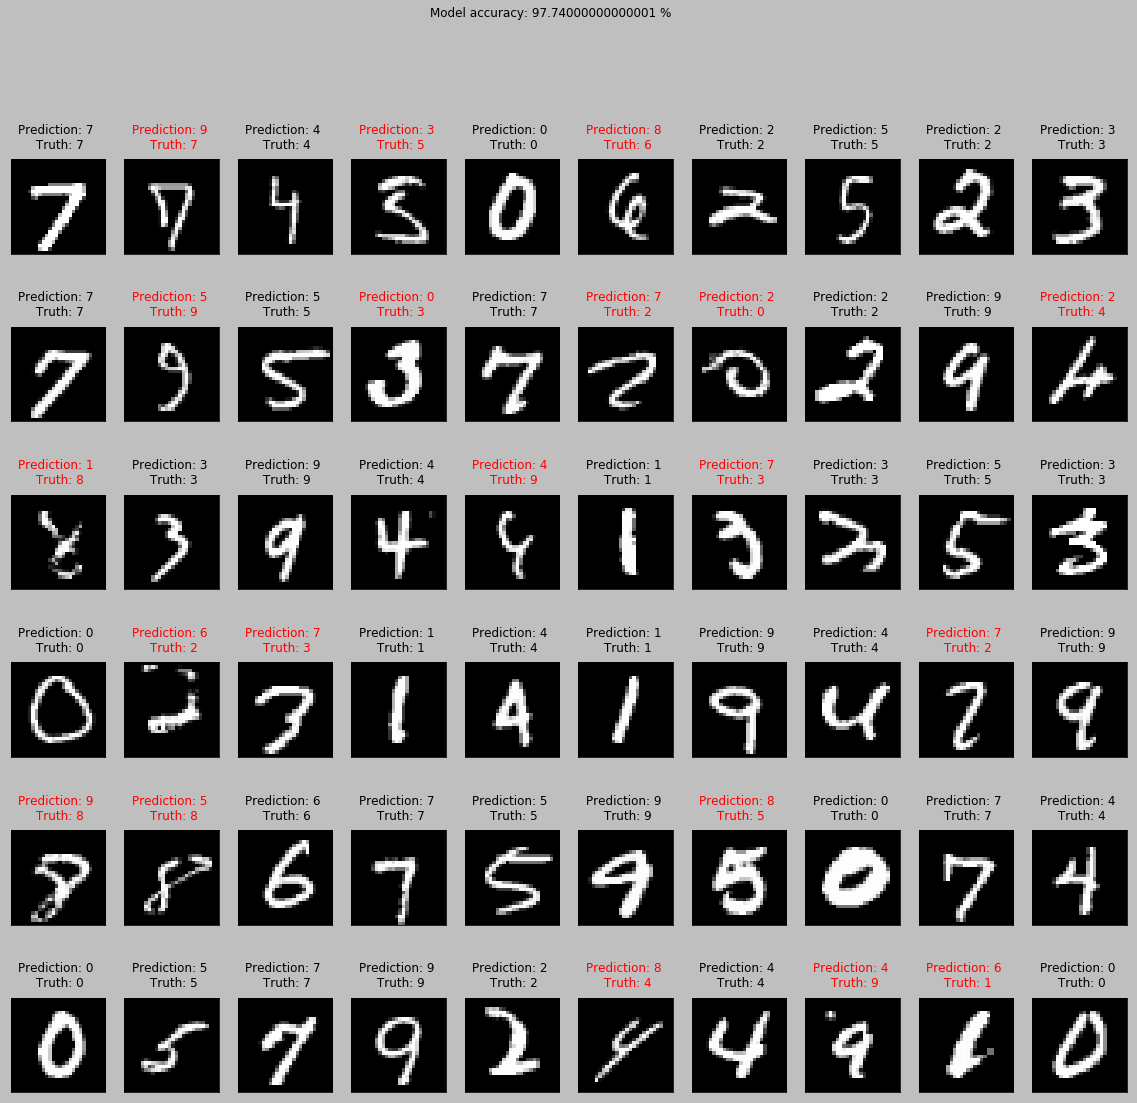

In [16]:
K.clear_session()
model = load_model(path.join('models', 'mlp3.h5'))
show_test(model, (i_test, l_test))